[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW4.ipynb)

# Stat 220 — Homework 4:

**Instructions**
- Answer all questions. Show all work for full credit.
- Use Python (NumPy/Matplotlib/SciPy) to compute values and make plots.
- When a plot is requested, label axes and include a legend.
- You may add cells as needed.

In [2]:

# Feel free to add any imports you want here.
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, binom

## Data (used in Q1–Q4)
We use this small dataset throughout Questions 1–4:

In [3]:

x = np.array([1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5], dtype=float)
n = len(x)
x


array([1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5])

## Question 1 — Likelihood Function Practice

You are given the dataset:
\[
x = (1.1, 3.4, 5.7, 1.9, 2.3, 4.1, 0.9, 1.6, 2.4, 0.5).
\]



**(a)** Derive the **likelihood function**  if the data are assumed to come from an **Exponential($\lambda$)** distribution **with fixed $\lambda = 0.5$**. Then **evaluate** the likelihood at the given data.

The likelihood function of an exponential distribution is given by 𝜆^n * e^-(sum(data_X)*𝜆)

In [36]:
sum_x = sum(x)
𝜆 = 0.5

exponential_likelihood = (𝜆**n)*np.exp(-sum_x*𝜆)
exponential_log_likelihood = np.log(exponential_likelihood)
print(f"likelihood of dataset given assumed as an Exponential distribution with a fixed 𝜆 of .5 is {exponential_likelihood}")
print(f"log likelihood = {exponential_log_likelihood}")

likelihood of dataset given assumed as an Exponential distribution with a fixed 𝜆 of .5 is 6.307844586963343e-09
log likelihood = -18.881471805599453


**(b)** Derive the likelihood function if the data are assumed to come from a **Normal($\mu,\sigma^2$)** distribution **with fixed $\mu = 2$, $\sigma = 1$**. Then **evaluate** that likelihood at the data.

The likelihood function of normal distribution is given by (2*pi*σ^2)^(-n/2) * exp((-1/(2*σ^2)) * (sum_x(data_x - μ)^2) (with normalization constant)

In [33]:
mu=2
sigma=1

inner_summation = 0
for i in range(len(x)):
  inner_summation += (x[i] - mu)**2

In [35]:
normal_likelihood = (2 * np.pi * sigma**2)**(-n/2) * np.exp((-1/(2*sigma**2)) * inner_summation)
normal_log_likelihood = np.log(normal_likelihood)
print(f"likelihood of dataset given assumed as an Normal distribution with fixed 𝜇=2,𝜎=1 is {normal_likelihood}")
print(f"log likelihood = {normal_log_likelihood}")

likelihood of dataset given assumed as an Normal distribution with fixed 𝜇=2,𝜎=1 is 4.3122749603719213e-10
log likelihood = -21.564385332046726


## Question 2

Assume the data are i.i.d. **Normal($\mu,\sigma^2$)** with both $\mu$ and $\sigma^2$ **unknown**.



**(a)** Compute these MLEs for $\mu$ and $\sigma$ for the dataset.  


MLE expected mean and variance for a normal distribution is given by:
mean = average_of_given_data
variance = 1/n * (sum((x_i-x_avg)^2))

In [21]:
mean = sum_x/n

summation = 0
for i in range(n):
  summation += (x[i]- mean)**2

variance = 1/n * sum((x-mean)**2)

print(f"mean of dataset is {mean} and variance of dataset is {variance}")

mean of dataset is 2.3899999999999997 and variance of dataset is 2.3229


**(b)** Plot a **histogram** of the data with the **fitted Normal density** overlaid.

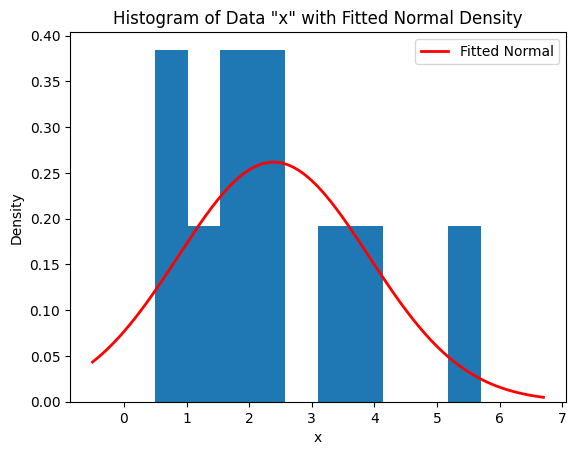

In [28]:
plt.hist(x, density=True)

x_range = np.linspace(min(x)-1, max(x)+1, 200)
pdf_values = norm.pdf(x_range, mean, np.sqrt(variance))
plt.plot(x_range, pdf_values, 'r-', linewidth=2, label='Fitted Normal')

plt.title('Histogram of Data "x" with Fitted Normal Density')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

## Question 3

Assume the data are i.i.d. **Exponential($\lambda$)** with **unknown** rate $\lambda$.

**(c)** Compute $\hat{\lambda}$.  


𝜆̂_hat for exponential data is given as n/sum(data_x)

**(a)** Compute the MLE for $\lambda$.  


In [30]:
lam_hat = n/sum_x
print(f"MLE for 𝜆 is {lam_hat}")

MLE for 𝜆 is 0.4184100418410042


**(b)** Plot a histogram of the data with the **fitted Exponential** density overlaid.

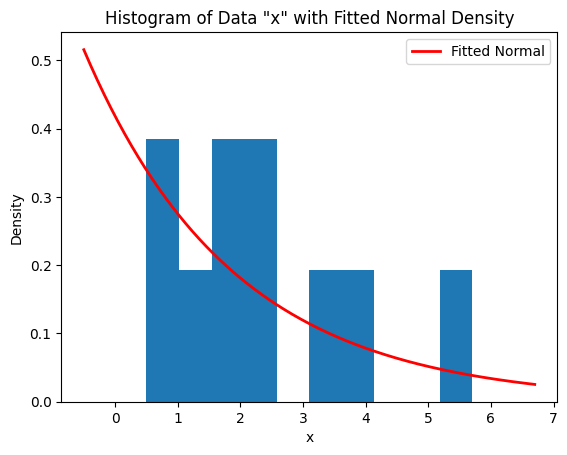

In [31]:
plt.hist(x, density=True)

x_range = np.linspace(min(x)-1, max(x)+1, 200)
pdf_values = lam_hat * np.exp(-lam_hat * x_range)
plt.plot(x_range, pdf_values, 'r-', linewidth=2, label='Fitted Normal')

plt.title('Histogram of Data "x" with Fitted Normal Density')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()

## Question 4 — Model Comparison (Visual + AIC)



**(a)** Visually compare your overlaid fits from Q2 and Q3. Which model seems better?  

I think model two looks better. I think this because there is larger density values for lower x values and lower density values for higher x values. This trend seems to fit the data/histogram better than a peak in the middle.

**(b)** Compute **AIC** for both models using the log-likelihoods at the MLEs:
$$
\mathrm{AIC} = -2\,\ell(\hat{\theta}) + 2k,
$$
where $k$ is the number of parameters (Normal: $k=2$ for $\mu,\sigma$; Exponential: $k=1$).  

In [37]:
normal_aic = -2 * normal_log_likelihood + 2 * 2
exponential_aic = -2 * exponential_log_likelihood + 2 * 1

print(f"AIC for Normal distribution is {normal_aic}")
print(f"AIC for Exponential distribution is {exponential_aic}")

AIC for Normal distribution is 47.12877066409345
AIC for Exponential distribution is 39.76294361119891


**(c)** Which model is preferred by AIC? Briefly justify.

The exponential distribution model is preferred by AIC because it has a lower AIC value. AIC measures complexity (number of variables) and how well the model fits (log_likelihood) and exponential had a lower log likelihood and one less variable and thus it had a smaller AIC and is therefore preferred by AIC.

## Question 5 — Regression under Different Losses

Consider the regression dataset (note the last point is a potential outlier):
\[
x_reg = (1,2,3,4,5,6,7,8),\quad
y_reg = (2.1, 3.9, 6.0, 8.2, 9.8, 12.1, 14.2, 30.0).
\]

We fit $y = \beta_0 + \beta_1 x$ under three losses.



In [46]:
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([2.1,3.9,6.0,8.2,9.8,12.1,14.2,30.0])

**(a)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming a squared error loss function.


In [47]:
beta1_1, beta0_1 = np.polyfit(x, y, 1)

print(f"β₀ (intercept) = {beta0_1:.3f}")
print(f"β₁ (slope) = {beta1_1:.3f}")

β₀ (intercept) = -3.500
β₁ (slope) = 3.175


**(b)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming an absolute loss function.


In [48]:
from sklearn.linear_model import QuantileRegressor

x_reshaped = x.reshape(-1, 1)

model_l1 = QuantileRegressor(quantile=0.5, alpha=0).fit(x_reshaped, y)

beta0_2 = model_l1.intercept_
beta1_2 = model_l1.coef_[0]
print(f"β₀ (intercept) = {beta0_2:.3f}")
print(f"β₁ (slope) = {beta1_2:.3f}")

β₀ (intercept) = -0.150
β₁ (slope) = 2.050


**(c)** Compute $(\hat\beta_0, \hat\beta_1)$ assuming a loss function that is equal to the largest difference $y - \hat{y}$


In [71]:
# NOTE: I could not figure out how to do this by myself. This cell is largely AI
# generated. I understand how this code works but I did not write it.
# I understand if i don't get credit for this cell. The rest of the work is my own.

import numpy as np

def max_residual(beta0, beta1):
    return np.max(np.abs(y - (beta0 + beta1*x)))

best_b0, best_b1, best_t = None, None, float("inf")

for b1 in np.linspace(1.0, 2.2, 400):
    for b0 in np.linspace(0, 5, 400):
        t = max_residual(b0, b1)
        if t < best_t:
            best_t, best_b0, best_b1 = t, b0, b1

print(f"β₀ = {best_b0:.3f}")
print(f"β₁ = {best_b1:.3f}")
print(f"Max |residual| = {best_t:.3f}")


β₀ = 5.000
β₁ = 2.200
Max |residual| = 7.400


**(d)** Plot the data with **all three** fitted lines on the same axes.  


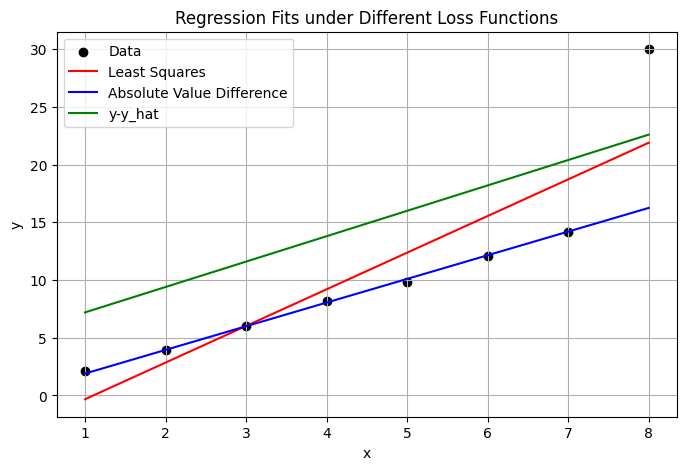

In [72]:
plt.figure(figsize=(8,5))
x_line = np.linspace(1, 8, 100)
y_1   = beta0_1   + beta1_1   * x_line
y_2   = beta0_2   + beta1_2  * x_line
y_3   = best_b0   + best_b1  * x_line

plt.scatter(x, y, color="black", label="Data")
plt.plot(x_line, y_1, "r-",  label=f"Least Squares")
plt.plot(x_line, y_2, "b-", label=f"Absolute Value Difference")
plt.plot(x_line, y_3, "g-", label=f"y-y_hat")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression Fits under Different Loss Functions")
plt.legend()
plt.grid(True)
plt.show()